<a href="https://colab.research.google.com/github/somesh1237/Research-Projects/blob/main/Tweet_Sentiment_Analysis_LogisticRegression_Dataset4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/AI_Research_Datasets/Tweets_Dataset4.csv')

In [ ]:
# Drop NaN values
df.dropna(inplace=True)

In [ ]:
# Split the data into features and target
X = df['clean_text']
y = df['category']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8306129962569798
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.85      0.61      0.71      7152
         0.0       0.76      0.97      0.85     11067
         1.0       0.90      0.83      0.86     14375

    accuracy                           0.83     32594
   macro avg       0.84      0.80      0.81     32594
weighted avg       0.84      0.83      0.83     32594



In [ ]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

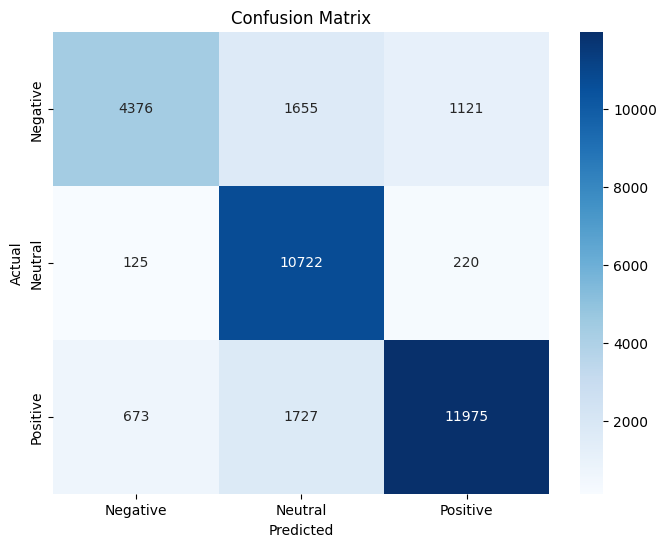

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive'])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    Negative       0.85      0.61      0.71      7152
     Neutral       0.76      0.97      0.85     11067
    Positive       0.90      0.83      0.86     14375

    accuracy                           0.83     32594
   macro avg       0.84      0.80      0.81     32594
weighted avg       0.84      0.83      0.83     32594



<ipython-input-62-f3d2e0ccc2b5>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='coolwarm')


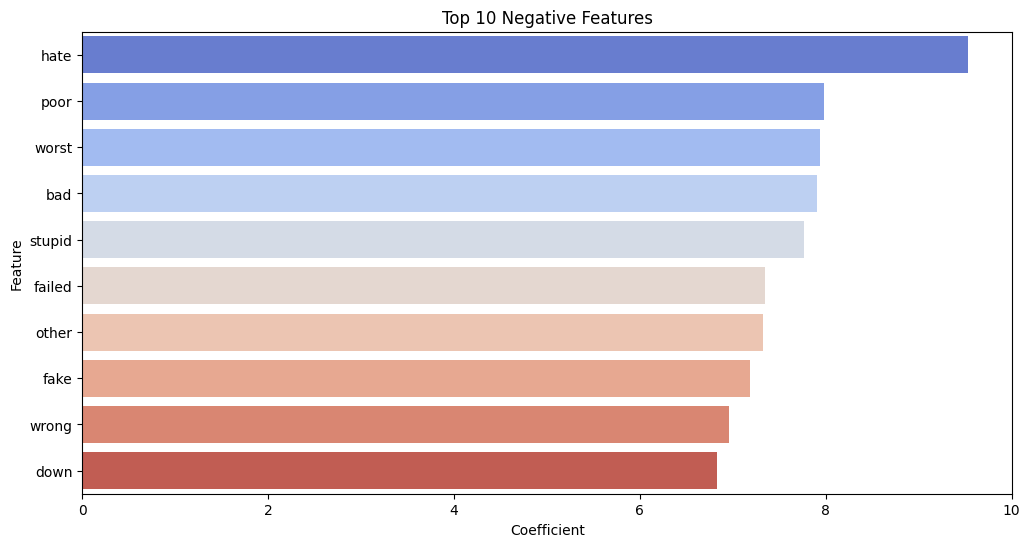

<ipython-input-62-f3d2e0ccc2b5>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=bottom_features, palette='coolwarm')


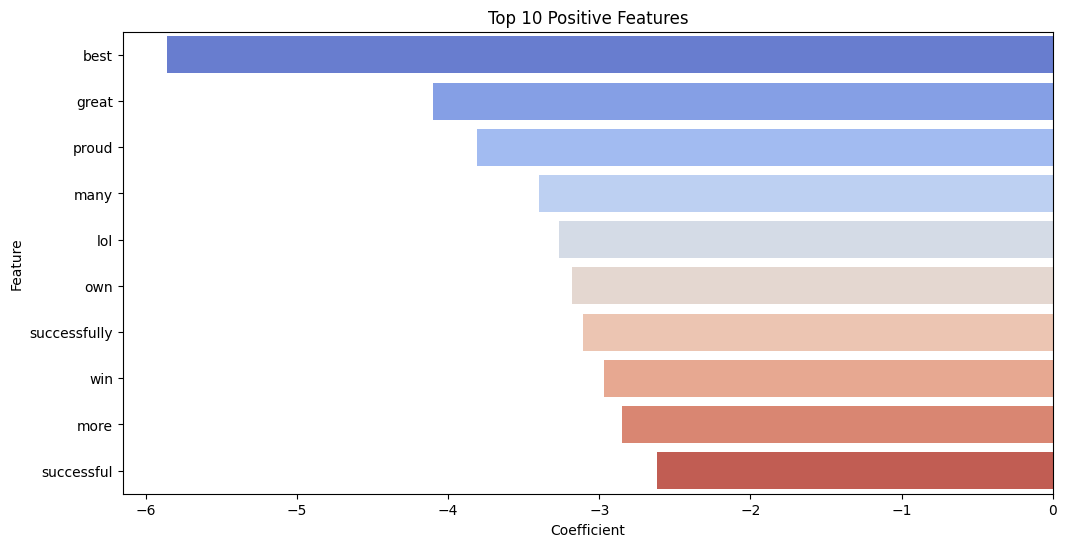

In [ ]:
# Get feature names from vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get coefficients of the logistic regression model
coef = model.coef_[0]

# Create DataFrame of feature names and coefficients
features_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef})

# Sort features by coefficient magnitude
top_features = features_df.nlargest(10, 'Coefficient')  # top 10 positive features
bottom_features = features_df.nsmallest(10, 'Coefficient')  # top 10 negative features

# Plot top positive and negative features
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='coolwarm')
plt.title('Top 10 Negative Features')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=bottom_features, palette='coolwarm')
plt.title('Top 10 Positive Features')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()